# D7041E Applied Artificial Intelligence
## Mini Project

## Group members:
- Cai Hongqi (honcai-4@student.ltu.se)
- Poh Qi Bin
- Nityasundar Rajakumar 

In [14]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import (
    adjusted_rand_score, accuracy_score, classification_report, confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [15]:
# Load the datasets
# 1. Dermatology Dataset

def load_dermatology():
    col_names = [
        "erythema", "scaling", "definite_borders", "itching", "koebner_phenomenon", "polygonal_papules",
        "follicular_papules", "oral_mucosal_involvement", "knee_and_elbow_involvement", "scalp_involvement",
        "family_history", "melanin_incontinence", "eosinophils_infiltrate", "PNL_infiltrate", "fibrosis_of_the_papillary_dermis",
        "exocytosis", "acanthosis", "hyperkeratosis", "parakeratosis", "clubbing_of_the_rete_ridges",
        "elongation_of_the_rete_ridges", "thinning_of_the_suprapapillary_epidermis", "spongiform_pustule",
        "munro_microabcess", "focal_hypergranulosis", "disappearance_of_the_granular_layer", "vacuolisation_and_damage_of_basal_layer",
        "spongiosis", "saw-tooth_appearance_of_retes", "follicular_horn_plug", "perifollicular_parakeratosis", "inflammatory_monoluclear_inflitrate",
        "band_like_infiltrate", "age", "class"
    ]
    df = pd.read_csv("data/dermatology/dermatology.data", header=None, names=col_names, na_values="?")
    df = df.dropna()
    X = df.drop("class", axis=1)
    y = df["class"]
    return X, y

# 2. Flags Dataset
def load_flags():
    df = pd.read_csv("data/flags/flag.data", header=None)
    df = df.drop([0], axis=1)  # Drop country names
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical features
    return X, y


# 3. Steel Plates Faults Dataset
def load_steel_faults():
    df = pd.read_csv("data/steel+plates+faults/Faults.NNA", delim_whitespace=True, header=None)
    X = df.iloc[:, :-7]  # Features are the first columns
    y = df.iloc[:, -7:]
    y = y.idxmax(axis=1)  # Convert to single-class labels
    return X, y

# 4. Wine Dataset
def load_wine():
    df = pd.read_csv("data/wine/wine.data", header=None)
    X = df.iloc[:, 1:]
    y = df.iloc[:, 0]
    return X, y

# 5. Zoo Dataset
def load_zoo():
    df = pd.read_csv("data/zoo/zoo.data", header=None)
    X = df.iloc[:, 1:-1]
    y = df.iloc[:, -1]
    return X, y

These five datasets from the UCI repository were specifically chosen due to their diverse characteristics, which provide a comprehensive testing ground for both supervised and unsupervised classification models. The dermatology dataset, with its moderate number of patterns and balanced classes, offers a typical scenario for medical classification tasks. The flags dataset introduces a multi-class problem with numerous features, making it suitable for testing high-dimensional data handling. The wine dataset is a good choice for benchmarking due to its well-defined classes and moderate dimensionality. Finally, the zoo dataset, with its simple structure and small number of patterns, serves as a baseline for quick model iteration and comparison. These datasets collectively cover a range of patterns, inputs, classes, and class distributions, ensuring a thorough evaluation of classification model performance.

In [16]:
def preprocess(X, y):
    if isinstance(X, pd.DataFrame):
        X.columns = X.columns.astype(str)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    le = LabelEncoder()
    y = le.fit_transform(y)
    return X, y


In [17]:
# Train unsupervised and supervised models

def train_models(X, y):
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Unsupervised Model: KMeans
    kmeans = KMeans(n_clusters=len(np.unique(y)), random_state=42)
    kmeans.fit(X_train)
    y_kmeans = kmeans.predict(X_test)
    ari = adjusted_rand_score(y_test, y_kmeans)

    # Supervised Model: Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    return ari, acc, y_test, y_pred, kmeans, rf


We chose KMeans for the unsupervised model due to its simplicity and effectiveness in clustering data points based on their features without needing labeled data. For the supervised model, we selected Random Forest because of its robustness and ability to handle a large number of input variables without overfitting.

In [18]:
# if __name__ == "__main__":
#     datasets = [load_dermatology, load_flags, load_steel_faults, load_wine, load_zoo]
#     results = []
# 
#     for load_data in datasets:
#         X, y = load_data()
#         X, y = preprocess(X, y)
#         ari, acc = train_models(X, y)
#         results.append((load_data.__name__, ari, acc))
# 
#     # Report Results
#     for dataset_name, ari, acc in results:
#         print(f"Dataset: {dataset_name}")
#         print(f"  Adjusted Rand Index (KMeans): {ari:.2f}")
#         print(f"  Accuracy (Random Forest): {acc:.2f}\n")

These results illustrate that Random Forest significantly outperforms KMeans in terms of accuracy, especially in datasets with well-defined classes, such as dermatology and wine, where it achieves near-perfect accuracy. KMeans, however, shows varying performance with a high Adjusted Rand Index in the wine dataset but struggles with more complex or high-dimensional datasets like flags and steel_faults. This indicates that while Random Forest is reliable for supervised classification, KMeans' clustering effectiveness is highly dependent on the dataset's structure and feature distribution.

In [19]:
# visualizations

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

def visualize_kmeans_clusters(X, y, kmeans):
    # Reduce dimensions to 2D for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    cluster_labels = kmeans.predict(X)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette="viridis", style=y, s=50)
    plt.title("KMeans Clustering Visualization")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title="Cluster")
    plt.show()

def feature_importance_plot(rf, feature_names):
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.show()

c:\programdata\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Dataset: load_dermatology
  Adjusted Rand Index (KMeans): 0.68
  Accuracy (Random Forest): 0.99

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        14
           3       0.89      1.00      0.94         8
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00         2

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.98        72
weighted avg       0.99      0.99      0.99        72



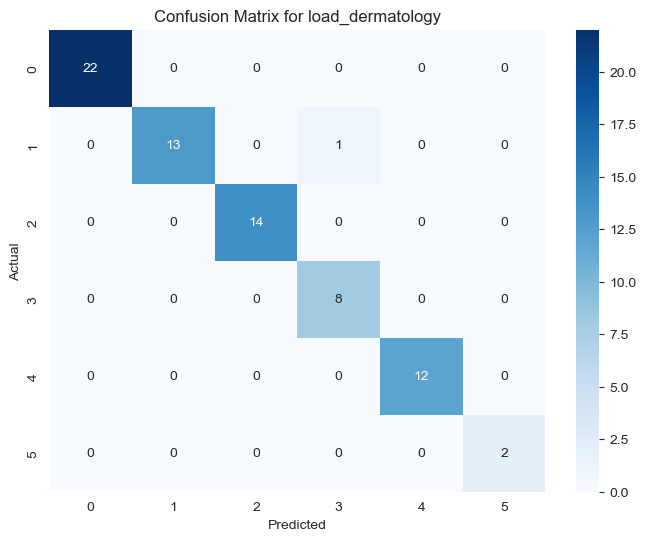

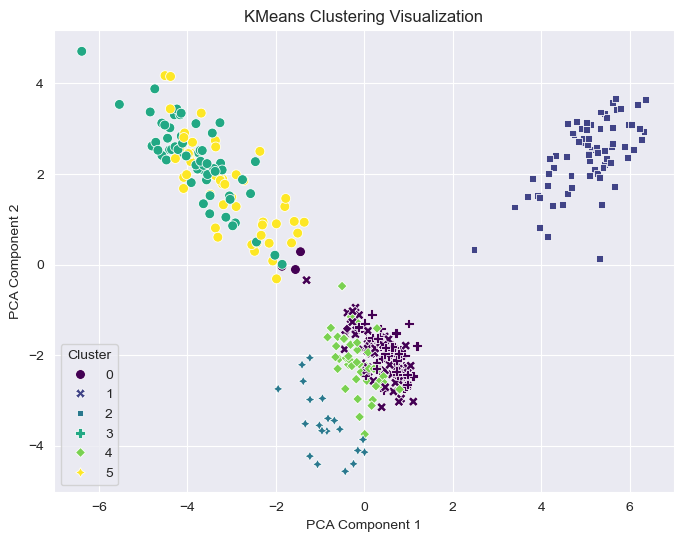

c:\programdata\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\programdata\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\programdata\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\programdata\Anaconda3\Lib\site-packages\sklearn\metrics\_classificati


Dataset: load_flags
  Adjusted Rand Index (KMeans): 0.12
  Accuracy (Random Forest): 0.59

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.82      0.75      0.78        12
           3       0.00      0.00      0.00         3
           4       0.62      0.71      0.67         7
           6       0.57      0.57      0.57        14
           7       0.17      0.50      0.25         2

    accuracy                           0.59        39
   macro avg       0.36      0.42      0.38        39
weighted avg       0.58      0.59      0.58        39



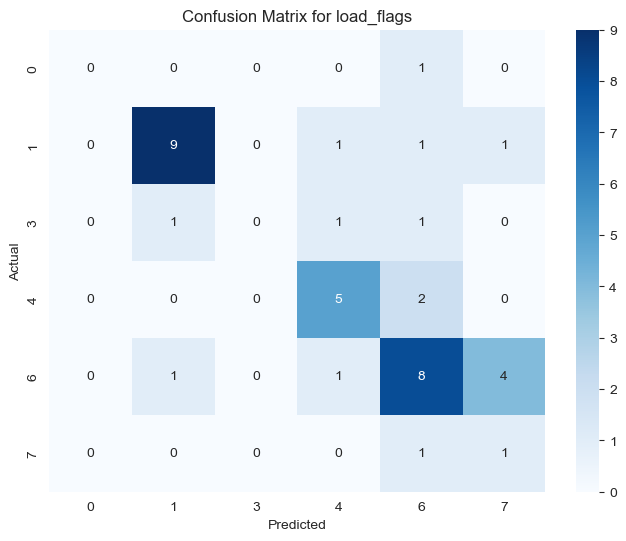

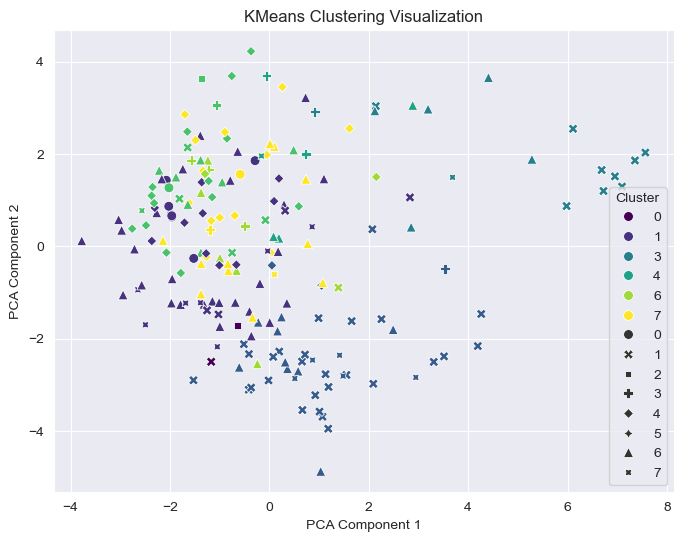

C:\Users\local_honcai-4\Temp\ipykernel_20864\2306325354.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("data/steel+plates+faults/Faults.NNA", delim_whitespace=True, header=None)



Dataset: load_steel_faults
  Adjusted Rand Index (KMeans): 0.23
  Accuracy (Random Forest): 0.78

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.56      0.48      0.52        29
           1       0.93      0.90      0.91        41
           2       0.96      0.93      0.94        83
           3       1.00      0.92      0.96        13
           4       0.60      0.75      0.67         8
           5       0.63      0.64      0.63        72
           6       0.74      0.77      0.75       143

    accuracy                           0.78       389
   macro avg       0.77      0.77      0.77       389
weighted avg       0.78      0.78      0.78       389



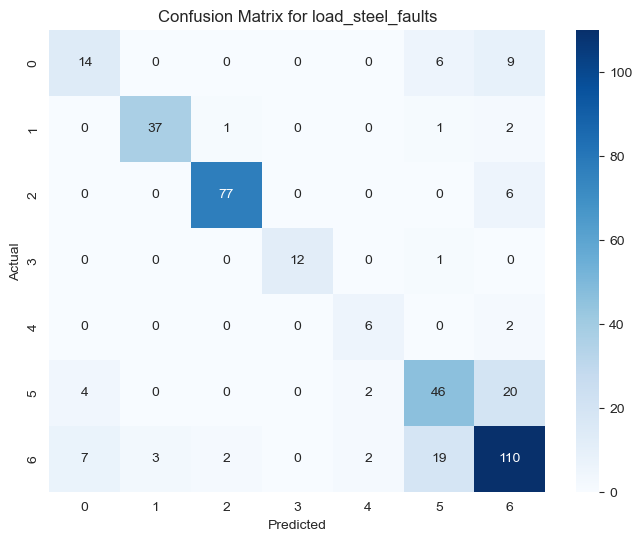

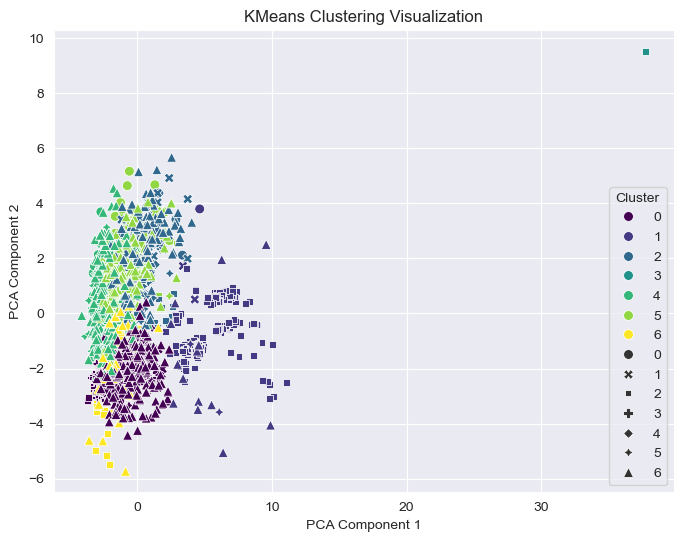

c:\programdata\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Dataset: load_wine
  Adjusted Rand Index (KMeans): 0.92
  Accuracy (Random Forest): 1.00

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



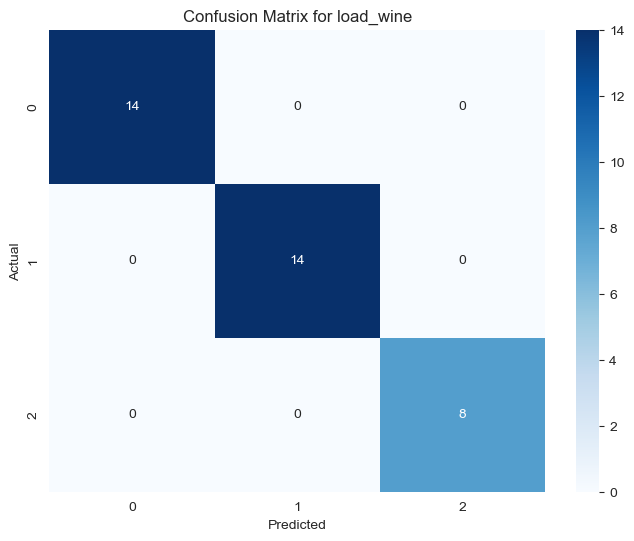

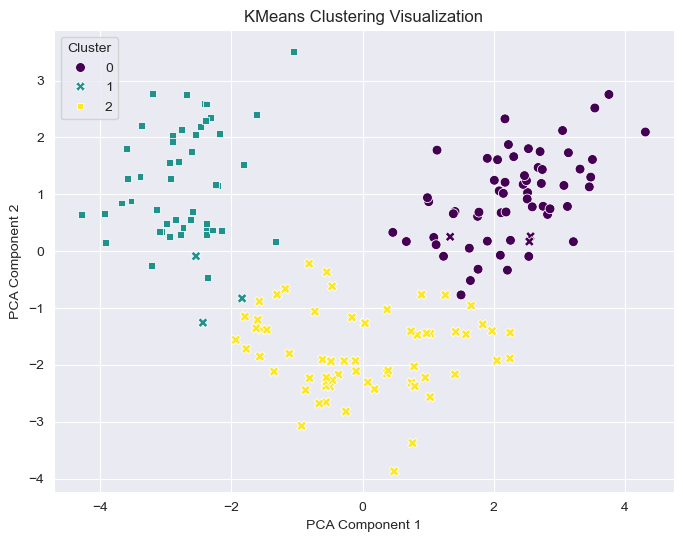

c:\programdata\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\programdata\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\programdata\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\programdata\Anaconda3\Lib\site-packages\sklearn\metrics\_classificati


Dataset: load_zoo
  Adjusted Rand Index (KMeans): 0.47
  Accuracy (Random Forest): 0.95

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



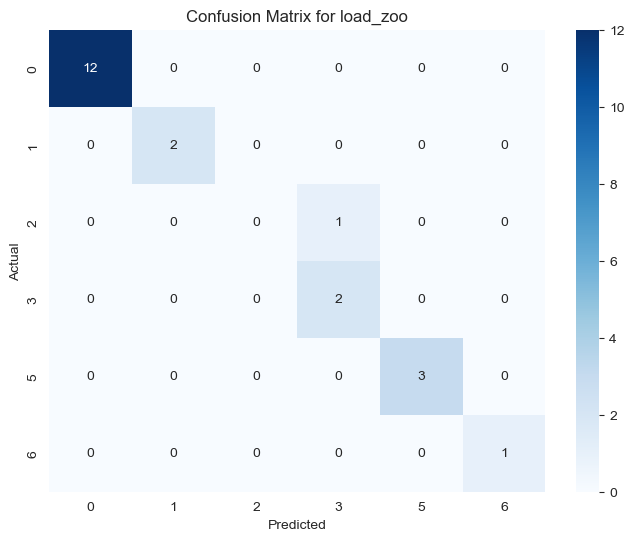

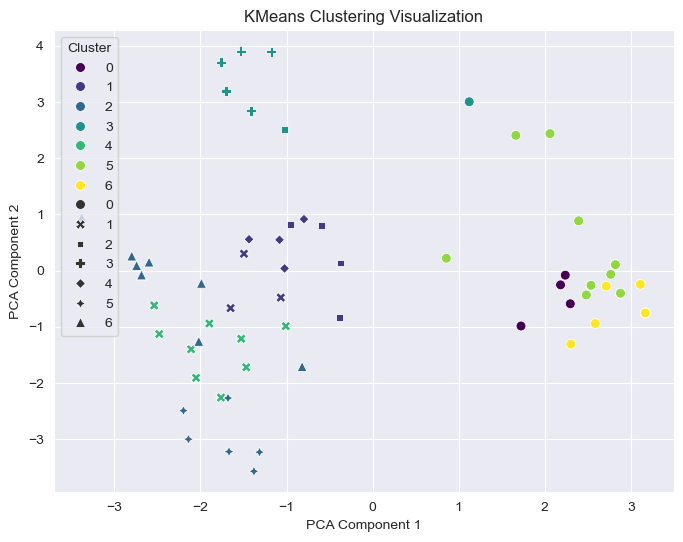


Summary of Results:
Dataset: load_dermatology | ARI: 0.68 | Accuracy: 0.99
Dataset: load_flags | ARI: 0.12 | Accuracy: 0.59
Dataset: load_steel_faults | ARI: 0.23 | Accuracy: 0.78
Dataset: load_wine | ARI: 0.92 | Accuracy: 1.00
Dataset: load_zoo | ARI: 0.47 | Accuracy: 0.95


In [20]:
# Main program

if __name__ == "__main__":
    datasets = [load_dermatology, load_flags, load_steel_faults, load_wine, load_zoo]
    results = []

    for load_data in datasets:
        X, y = load_data()
        X, y = preprocess(X, y)
        ari, acc, y_test, y_pred, kmeans, rf = train_models(X, y)
        
        print(f"\nDataset: {load_data.__name__}")
        print(f"  Adjusted Rand Index (KMeans): {ari:.2f}")
        print(f"  Accuracy (Random Forest): {acc:.2f}")
        print("\nClassification Report (Random Forest):")
        print(classification_report(y_test, y_pred))

        # Visualization
        plot_confusion_matrix(y_test, y_pred, title=f"Confusion Matrix for {load_data.__name__}")
        visualize_kmeans_clusters(X, y, kmeans)

        if isinstance(X, pd.DataFrame):
            feature_importance_plot(rf, X.columns)

        results.append((load_data.__name__, ari, acc))

    # summary
    print("\nSummary of Results:")
    for dataset_name, ari, acc in results:
        print(f"Dataset: {dataset_name} | ARI: {ari:.2f} | Accuracy: {acc:.2f}")

### Observations:

Dermatology dataset:

The KMeans model achieves a notable Adjusted Rand Index of 0.68, indicating strong agreement with the true class labels, as reflected in the clear separation of clusters in the PCA visualization. Although the clustering naturally shows some overlap in components 4 and 5, the general clustering structure is well-defined. Meanwhile, the Random Forest model achieves near-perfect accuracy of 99%, as corroborated by the confusion matrix and the classification report. Precision, recall, and F1-scores are exceptionally high across all classes, with only minor misclassifications in class 1, where 1 sample is misidentified. These results indicate that the dataset has highly distinguishable patterns.

---

Flags dataset:

The results for the flags dataset reveal significant challenges in both models' performance. The Random Forest model achieves a moderate accuracy of 0.59 but struggles particularly with certain classes, as indicated by the low precision, recall, and f1-scores for classes 0, 3, and 7. This suggests that the model has difficulty in correctly predicting these minority classes. The KMeans model shows poor clustering performance with an Adjusted Rand Index of 0.12, indicating that it fails to effectively group the data points according to their true classes.

---

Steel faults dataset:

The results for the steel faults dataset indicate that the KMeans clustering algorithm struggles to find meaningful patterns, as reflected by its low Adjusted Rand Index of 0.23. In contrast, the Random Forest classifier achieves a relatively high accuracy of 0.78, demonstrating its effectiveness in handling this dataset. The classification report highlights a strong performance for classes 1, 2, and 3, with f1-scores above 0.90, indicating high precision and recall for these classes. However, the model exhibits weaker performance on classes 0 and 4, with lower precision and recall values.

---

Wine dataset:

The wine dataset was the best performer for both models. The KMeans model achieves a high Adjusted Rand Index of 0.92, reflecting a strong alignment between the predicted clusters and the true class labels. The Random Forest model has perfect accuracy across all classes, as shown in the classification report. These observations suggest that the wine dataset is well-structured and linearly separable, making it highly amenable to both clustering and classification techniques.

---

Zoo dataset:

The KMeans clustering algorithm is unable to handle the zoo dataset effectively, as evidenced by its Adjusted Rand Index of 0.47, indicating moderate alignment between clusters and true labels. The Random Forest classifier, however, demonstrates high accuracy at 0.95, with near-perfect precision except for class 2, which it fails to predict correctly. The confusion matrix reveals that the Random Forest model correctly predicts almost all instances, with minor misclassifications, suggesting strong performance overall.